### Import modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from handwritten_digits.utils_np import test_prediction
from handwritten_digits.data import one_hot

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Define model architecture

In [3]:
model = Sequential([
    Flatten(),
    Dense(784, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(32, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax),
])

### Train model

In [4]:
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9401 - accuracy: 0.7679
Epoch 2/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3231 - accuracy: 0.9072
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2497 - accuracy: 0.9272
Epoch 4/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2080 - accuracy: 0.9402
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1786 - accuracy: 0.9483
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1565 - accuracy: 0.9546
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1386 - accuracy: 0.9598
Epoch 8/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1239 - accuracy: 0.9646
Epoch 9/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1116 - accuracy: 0.96810s - l
Epoch 10/15
1875/1875 [==============================] - 2

### Evaluate model performance

In [6]:
training_loss, training_accuracy = model.evaluate(x=X_train, y=y_train)
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0963 - accuracy: 0.9692


### Evaluate predictions

In [7]:
# bring preds to same shape as in numpy model
probs = model.predict(X_test)
preds = probs == np.amax(probs, axis=1, keepdims=True)
preds = preds.T.astype(float)

In [8]:
# bring data to same shape as in numpy model
X_test_reshaped = X_test.reshape(X_test.shape[0], -1).T
y_test_reshaped = one_hot(y_test)

Prediction: 1
True label: 1


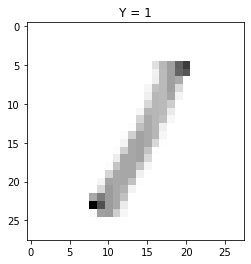

In [9]:
random_index = np.random.randint(0, preds.shape[1])
test_prediction(
    X=X_test_reshaped,
    Y=y_test_reshaped,
    pred=preds,
    index=random_index,
)